In [67]:
%load_ext autoreload
%autoreload 2
import pickle
import glob
import sys, copy
import numpy as np
import pyccl as ccl
#sys.path.append('../modules/')
import ModelClusterObservables
sys.path.append('../modules/')
import halo._halo_abundance
import matplotlib.pyplot as plt
def load(filename, **kwargs):
    with open(filename, 'rb') as fin:
        return pickle.load(fin, **kwargs)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Define Count and lensing mass models

In [68]:
import configparser
default_config_capish = configparser.ConfigParser()
default_config_capish.read('../config/capish.ini')
default_config_capish['summary_statistics']['richness_edges'] = '20, 30, 50, 80, 130, 200'
default_config_capish['summary_statistics']['redshift_edges'] = '0.2, 0.3, 0.4, 0.8, 1'

In [69]:
ClusterAbundanceObject = ModelClusterObservables.UniversePrediction( default_config=default_config_capish )

In [70]:
params_default = ClusterAbundanceObject.params_default 
cosmo_fid = params_default['CCL_cosmology']
params_new = params_default
compute_new= {'compute_dNdzdlogMdOmega':False,'compute_richness_mass_relation':False, 
               'compute_completeness':False, 'compute_purity':False ,'compute_halo_bias':True,
             'compute_dNdzdlogMdOmega_log_slope': False}
adds_new={'add_purity':False, 'add_completeness':False}

In [71]:
skyarea = ClusterAbundanceObject.HaloAbundanceObject.sky_area
fsky = skyarea/(4*np.pi)

In [72]:
Nfid = ClusterAbundanceObject.model_count(params_new, compute_new, adds_new)

In [75]:
res_default_capish = np.mean(np.array(load('./default_capish.pkl'))[:,0], axis=0)

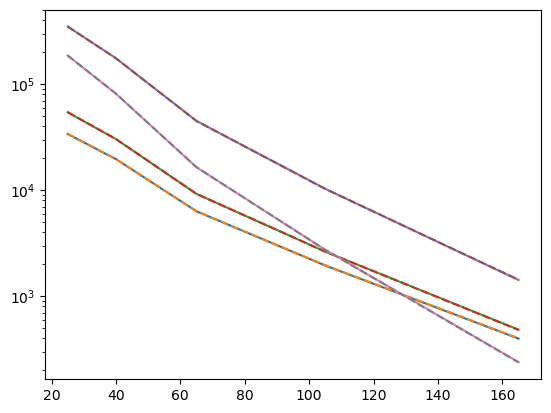

In [81]:
for i in range(len(ClusterAbundanceObject.redshift_centers)):
    plt.plot(ClusterAbundanceObject.richness_centers, Nfid[:,i])
    plt.plot(ClusterAbundanceObject.richness_centers, res_default_capish[:,i], '--')
    
plt.yscale('log')

In [74]:
Nfid

array([[3.39047037e+04, 5.42769273e+04, 3.49928889e+05, 1.86358006e+05],
       [1.96189060e+04, 3.03182966e+04, 1.75452876e+05, 8.12483030e+04],
       [6.32261380e+03, 9.22581887e+03, 4.49621849e+04, 1.64527619e+04],
       [1.94578059e+03, 2.62921020e+03, 1.02960323e+04, 2.73968758e+03],
       [3.98267738e+02, 4.83505234e+02, 1.42159474e+03, 2.38957675e+02]])